In [235]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [236]:
# load dataset
dic = {}
df = pd.read_csv('./chicago-west-nile-virus-mosquito-test-results/west-nile-virus-wnv-mosquito-test-results.csv', encoding="utf-8")

In [237]:
# Original data
print(df.shape)
print(df.dtypes)
df.head()

(27196, 18)
SEASON YEAR                     int64
WEEK                            int64
TEST ID                         int64
BLOCK                          object
TRAP                           object
TRAP_TYPE                      object
TEST DATE                      object
NUMBER OF MOSQUITOES            int64
RESULT                         object
SPECIES                        object
LATITUDE                      float64
LONGITUDE                     float64
LOCATION                       object
Wards                         float64
Census Tracts                 float64
Zip Codes                     float64
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
0,2018,39,47726,4XX W 127TH,T135,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,39,47720,5XX W 72ND ST,T035,GRAVID,2018-09-27T00:09:00.000,9,negative,CULEX PIPIENS/RESTUANS,41.763371,-87.637873,"{'longitude': '-87.6378726141474', 'human_addr...",32.0,511.0,21559.0,66.0,17.0
2,2018,39,47690,100XX W OHARE AIRPORT,T913,GRAVID,2018-09-27T00:09:00.000,15,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,39,47707,1XX N CENTRAL PARK DR,T030B,SENTINEL,2018-09-27T00:09:00.000,23,negative,CULEX PIPIENS,41.883711,-87.716092,"{'longitude': '-87.71609209177537', 'human_add...",23.0,176.0,21572.0,28.0,11.0
4,2018,39,47733,131XX S BRANDON AVE,T209,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX RESTUANS,41.657069,-87.546049,"{'longitude': '-87.54604886505916', 'human_add...",47.0,787.0,22250.0,52.0,47.0


In [238]:
# Preprocessing
df = df[df['RESULT'] == 'positive']
df = df.dropna() # 去除有空值的row
df = df.drop(columns = ['LOCATION', 'TEST ID', 'TRAP', 'SEASON YEAR', 'WEEK', 'RESULT'])
df['TEST DATE'] = df['TEST DATE'].str.split('T').str[0].str.replace('-', '') # 去掉時間轉為純日期字串
df['TEST DATE'] = df['TEST DATE'].astype('int64') # 字串轉為 int
nonNumCol = ['BLOCK', 'TRAP_TYPE', 'SPECIES', 'Zip Codes'] # 非數字欄位

for col in nonNumCol: # 將欄位轉為數值資料
    df[col] = df[col].astype('category')
    dic[col] = dict(enumerate(df[col].cat.categories)) # 類別對照dict
    df[col] = df[col].cat.codes

In [239]:
# New data
# print(dic)
print(df.shape)
print(df.dtypes)
print()
df.head()

(1748, 12)
BLOCK                            int8
TRAP_TYPE                        int8
TEST DATE                       int64
NUMBER OF MOSQUITOES            int64
SPECIES                          int8
LATITUDE                      float64
LONGITUDE                     float64
Wards                         float64
Census Tracts                 float64
Zip Codes                        int8
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object



,BLOCK,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
77,39,2,20180920,50,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
109,39,2,20180920,19,2,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
125,39,1,20180920,5,1,41.892220,-87.691698,46.0,177.0,9,24.0,41.0
127,39,2,20180920,50,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
145,39,2,20180913,42,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0


In [240]:
data = df.to_numpy() # convert to numpy array
print(data[:1])

[[ 3.90000000e+01  2.00000000e+00  2.01809200e+07  5.00000000e+01
   1.00000000e+00  4.18914545e+01 -8.76897627e+01  4.60000000e+01
   5.45000000e+02  9.00000000e+00  2.50000000e+01  4.10000000e+01]]


# 測試最高分

In [241]:
# data = data[:5000] # testing
sil_values = []
for i in range(3, 31):
    clustering = AgglomerativeClustering(n_clusters = i)
    res = clustering.fit(data)
    cluster_labels = res.labels_
    
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    sil_values.append(silhouette_avg)
    
    print("Clusters: ", i)
    print("Silhouette Value: ", silhouette_avg)
    print ("Number of sample in each cluster:")
    print (pd.Series(clustering.labels_).value_counts())
    print("========================================")

Clusters:  3
Silhouette Value:  0.6924028884203871
Number of sample in each cluster:
0    817
2    579
1    352
dtype: int64
Clusters:  4
Silhouette Value:  0.6798909176594568
Number of sample in each cluster:
0    579
2    550
1    352
3    267
dtype: int64
Clusters:  5
Silhouette Value:  0.7368556684734929
Number of sample in each cluster:
2    550
4    352
0    352
3    267
1    227
dtype: int64
Clusters:  6
Silhouette Value:  0.7438707460136372
Number of sample in each cluster:
0    550
4    352
2    290
3    267
1    227
5     62
dtype: int64
Clusters:  7
Silhouette Value:  0.8093476760408905
Number of sample in each cluster:
2    358
4    352
0    290
3    267
1    227
6    192
5     62
dtype: int64
Clusters:  8
Silhouette Value:  0.8335360603568985
Number of sample in each cluster:
2    358
4    352
1    267
0    227
3    212
6    192
7     78
5     62
dtype: int64
Clusters:  9
Silhouette Value:  0.8751609779940128
Number of sample in each cluster:
2    358
1    352
0    267
3  

In [242]:
print(sil_values)
max_sil = max(sil_values)
idx = sil_values.index(max_sil)+3  # index+3 = number of clusters
print(idx, max_sil)

[0.6924028884203871, 0.6798909176594568, 0.7368556684734929, 0.7438707460136372, 0.8093476760408905, 0.8335360603568985, 0.8751609779940128, 0.9328118477274627, 0.9563634576658386, 0.9692350817301002, 0.8963987898743658, 0.8266549279999327, 0.7829228782947083, 0.7412485150728629, 0.689989098639857, 0.6576503231039657, 0.6433539205726927, 0.6292151540599858, 0.6088393166545153, 0.5965533388325951, 0.5745622131837878, 0.572154237976292, 0.5613548689067105, 0.5485963943202293, 0.5336905515205456, 0.5270556770270921, 0.5194049374502803, 0.5087831760781119]
12 0.9692350817301002


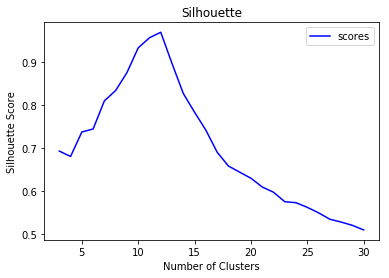

In [243]:
plt.title('Silhouette')
plt.plot(range(3, 31), sil_values, color='blue', label='scores')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 12群

In [244]:
clustering = AgglomerativeClustering(n_clusters = idx)
result = clustering.fit(data)
print(result)
print(result.labels_)
print(pd.Series(clustering.labels_).value_counts())
cols = list(df.columns.values)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=12,
            pooling_func='deprecated')
[4 4 4 ... 1 1 1]
0     352
2     328
1     212
5     196
6     192
4     138
8      89
3      78
9      71
7      47
10     30
11     15
dtype: int64


Cluster 0


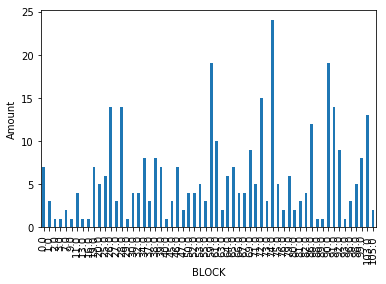

Cluster 1


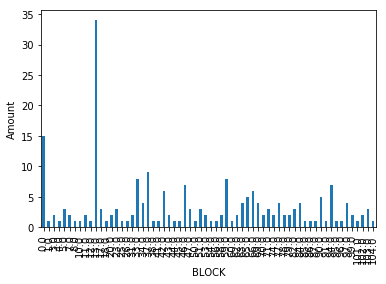

Cluster 2


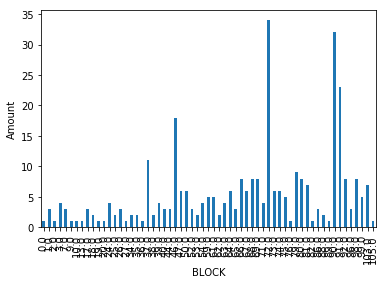

Cluster 3


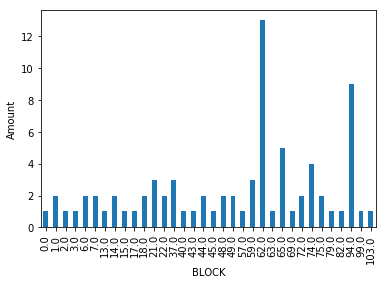

Cluster 4


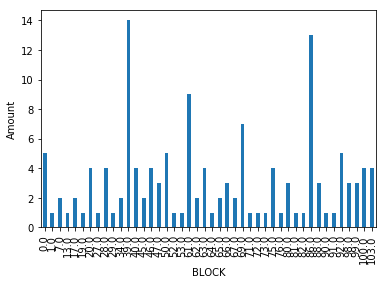

Cluster 5


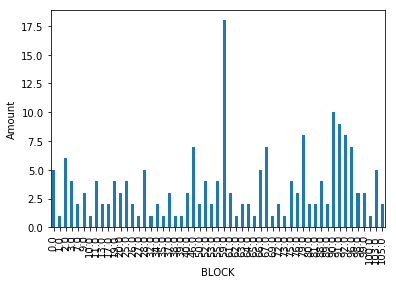

Cluster 6


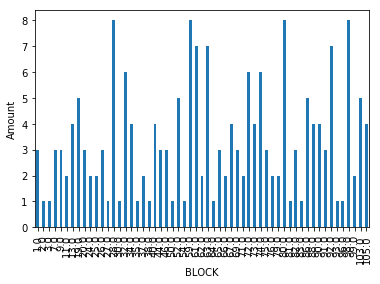

Cluster 7


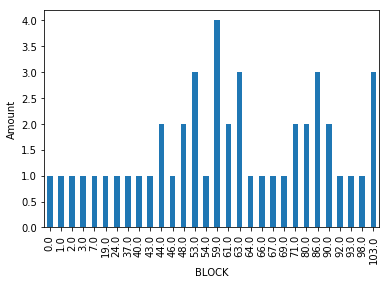

Cluster 8


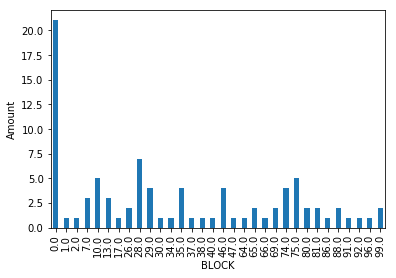

Cluster 9


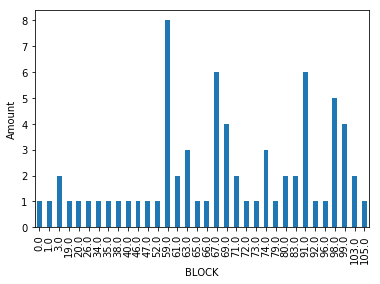

Cluster 10


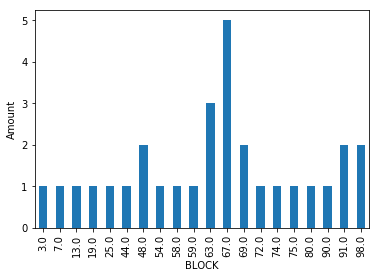

Cluster 11


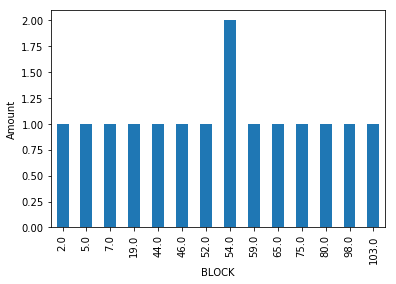

Cluster 0


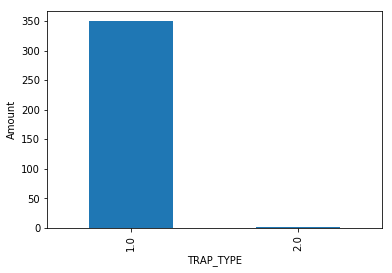

Cluster 1


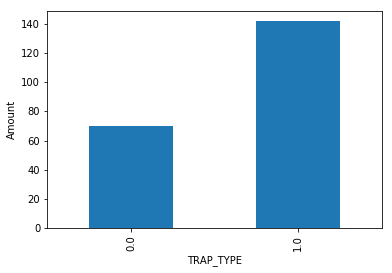

Cluster 2


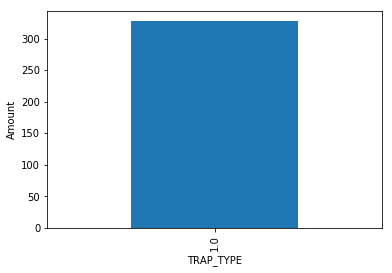

Cluster 3


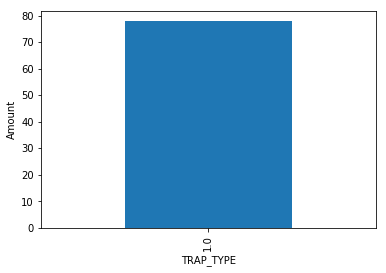

Cluster 4


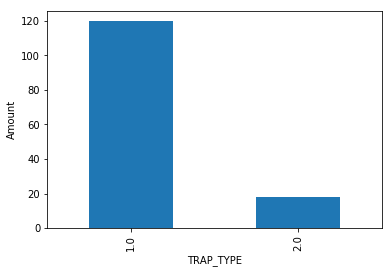

Cluster 5


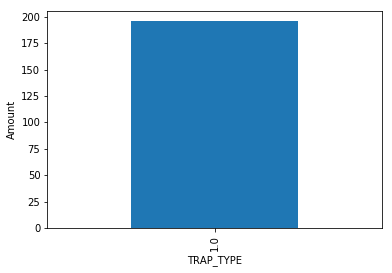

Cluster 6


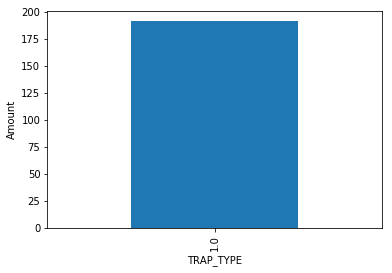

Cluster 7


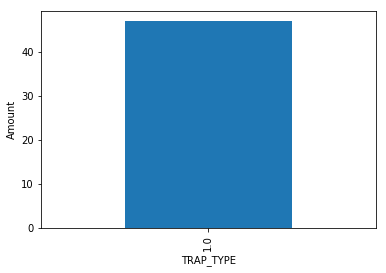

Cluster 8


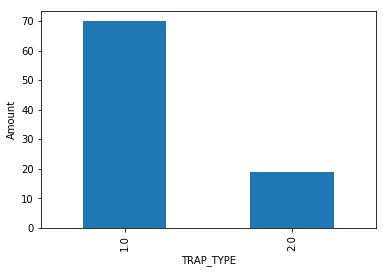

Cluster 9


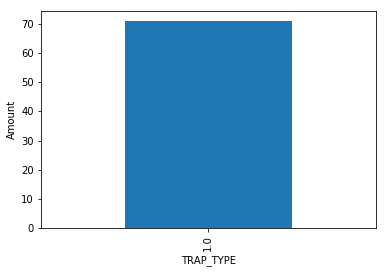

Cluster 10


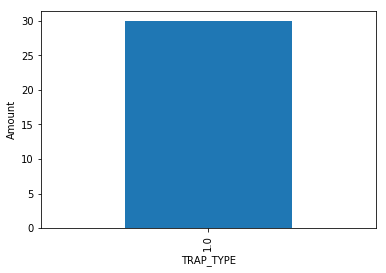

Cluster 11


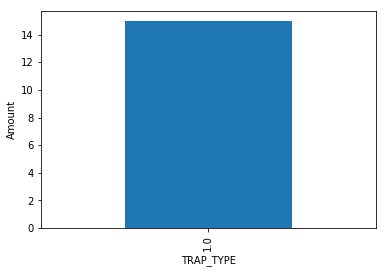

Cluster 0


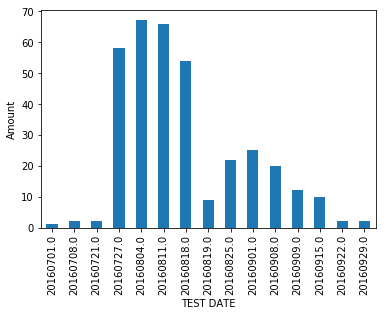

Cluster 1


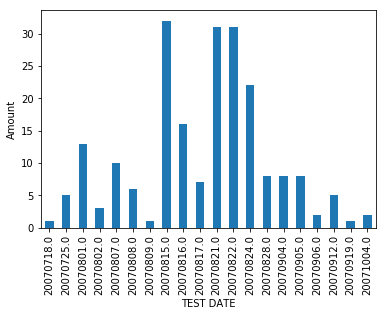

Cluster 2


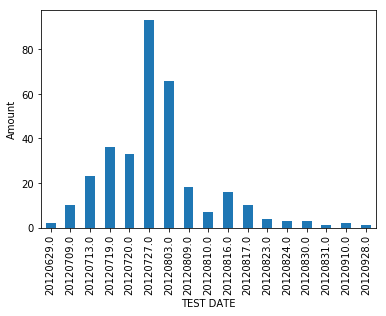

Cluster 3


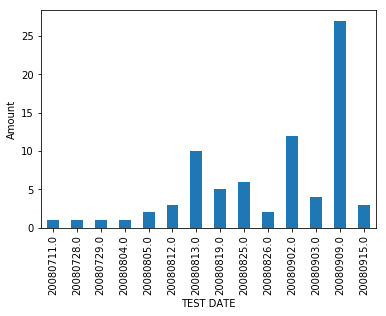

Cluster 4


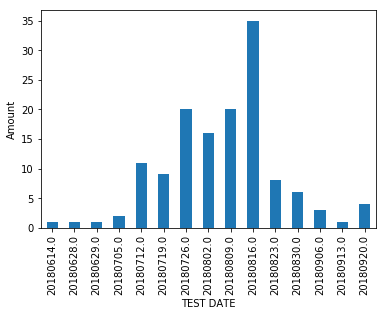

Cluster 5


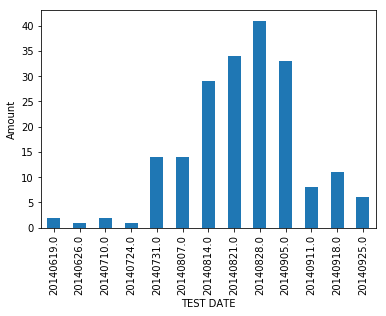

Cluster 6


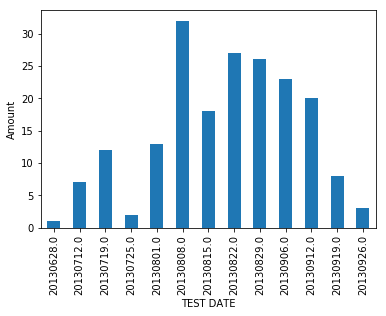

Cluster 7


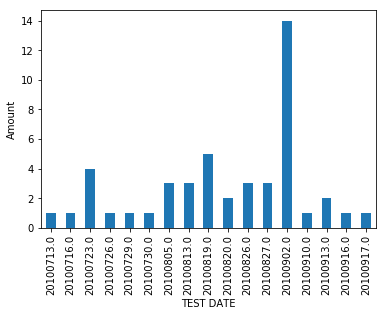

Cluster 8


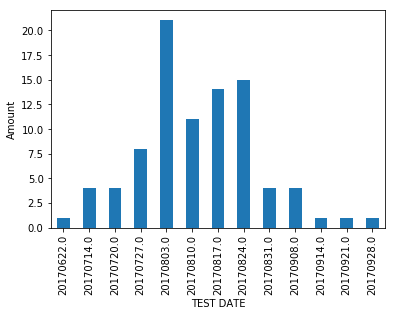

Cluster 9


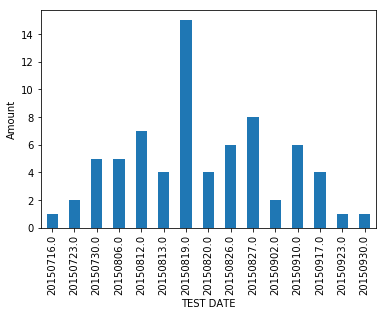

Cluster 10


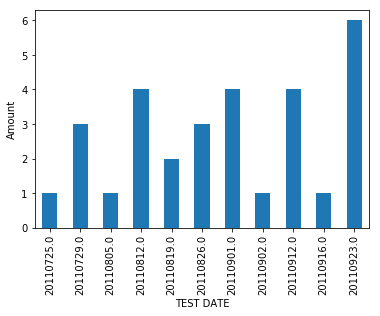

Cluster 11


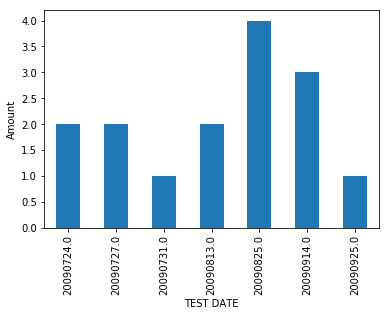

Cluster 0


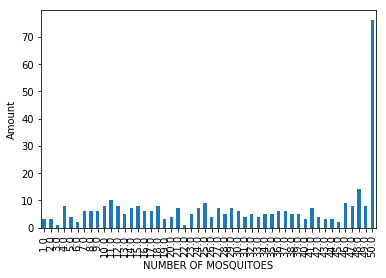

Cluster 1


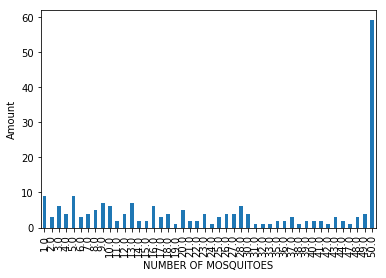

Cluster 2


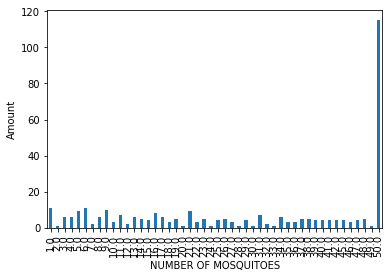

Cluster 3


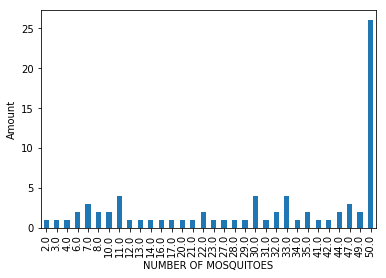

Cluster 4


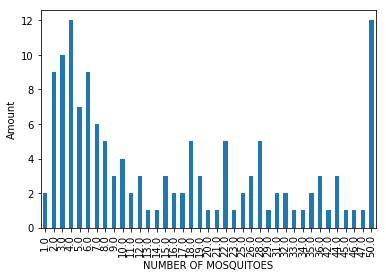

Cluster 5


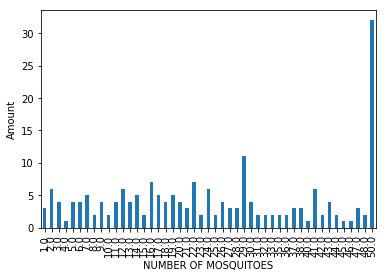

Cluster 6


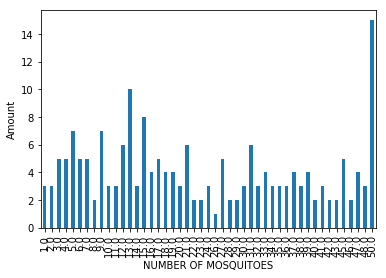

Cluster 7


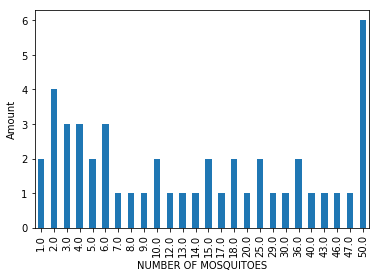

Cluster 8


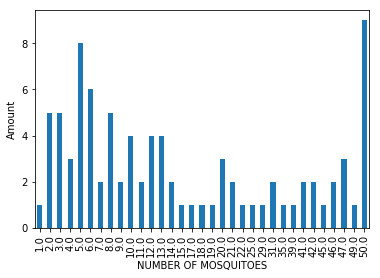

Cluster 9


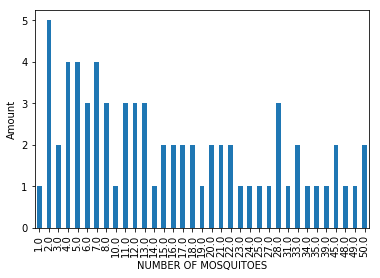

Cluster 10


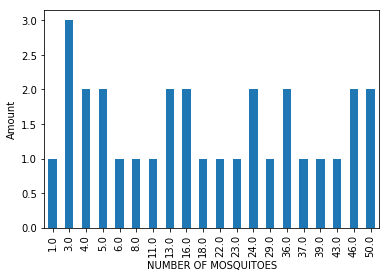

Cluster 11


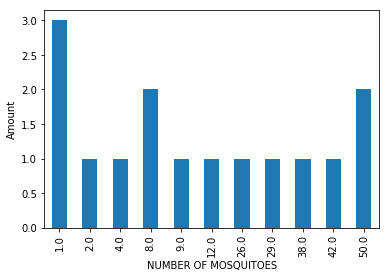

Cluster 0


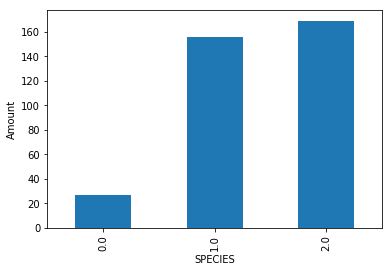

Cluster 1


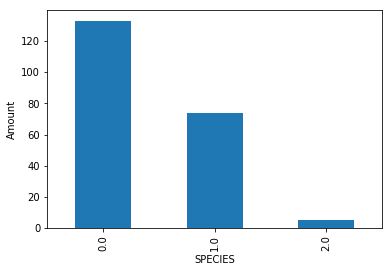

Cluster 2


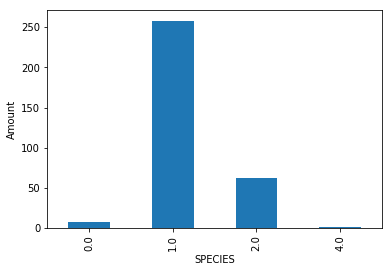

Cluster 3


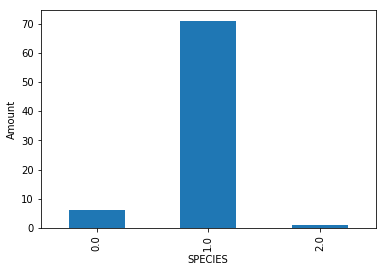

Cluster 4


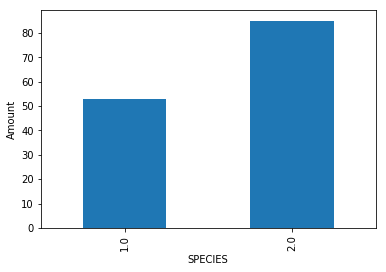

Cluster 5


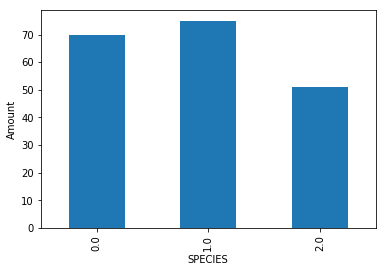

Cluster 6


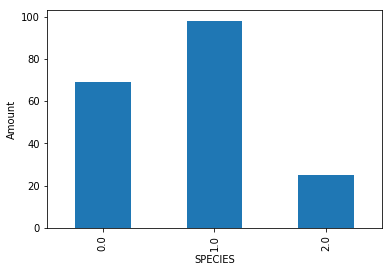

Cluster 7


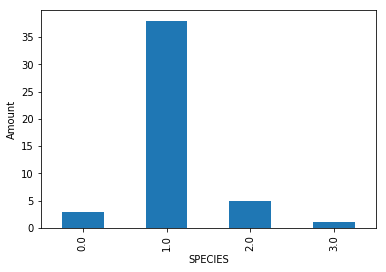

Cluster 8


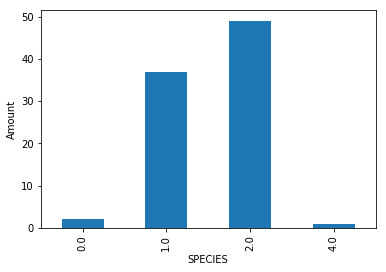

Cluster 9


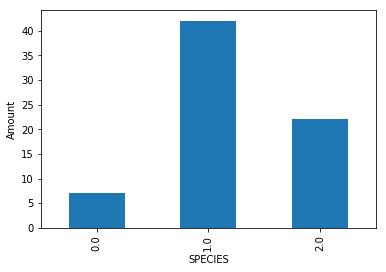

Cluster 10


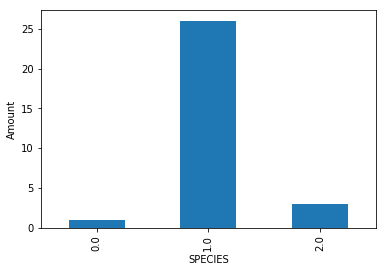

Cluster 11


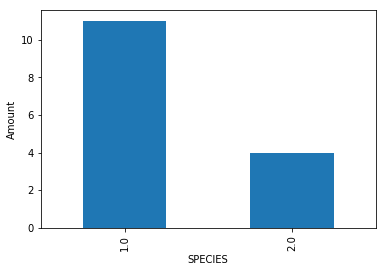

Cluster 0


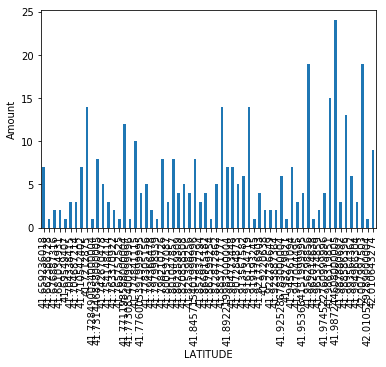

Cluster 1


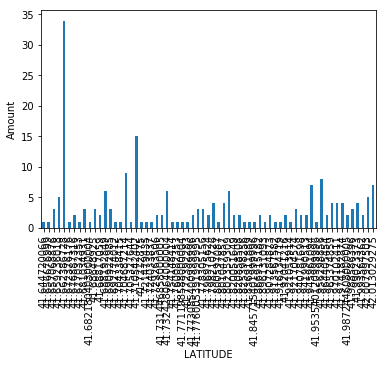

Cluster 2


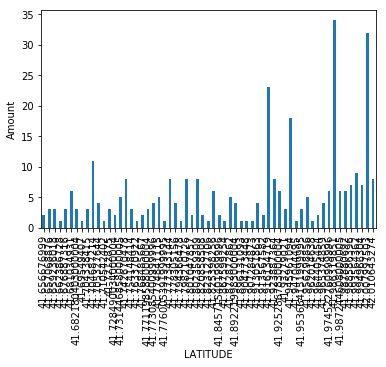

Cluster 3


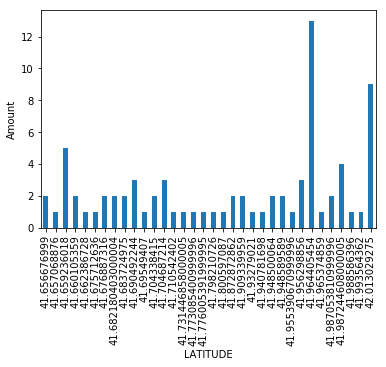

Cluster 4


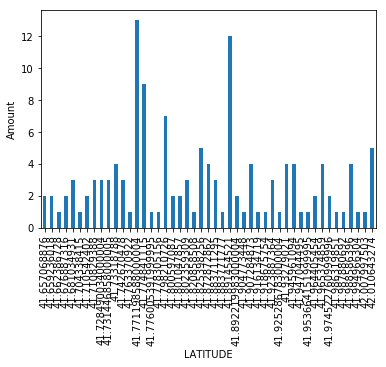

Cluster 5


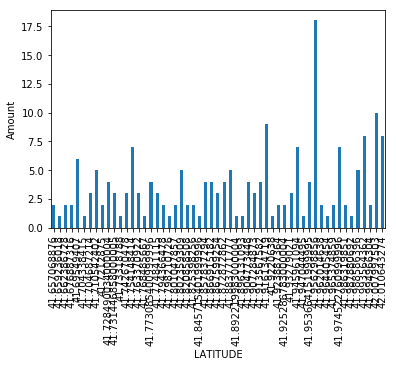

Cluster 6


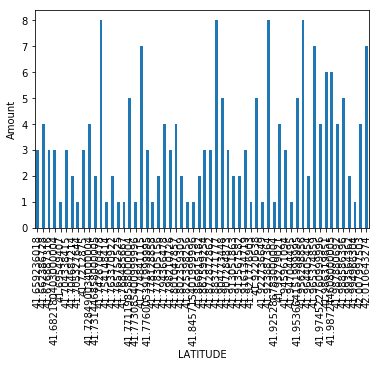

Cluster 7


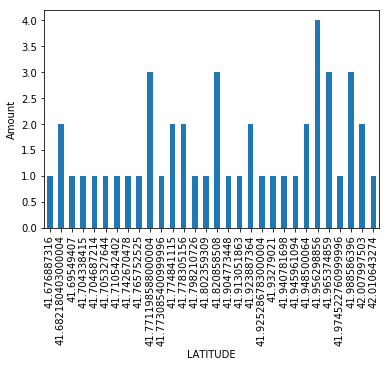

Cluster 8


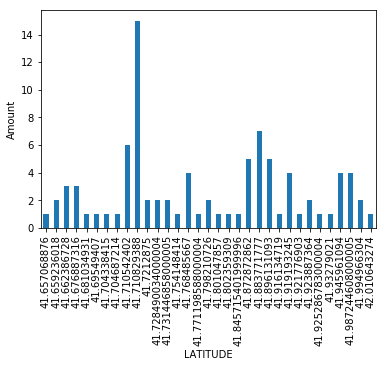

Cluster 9


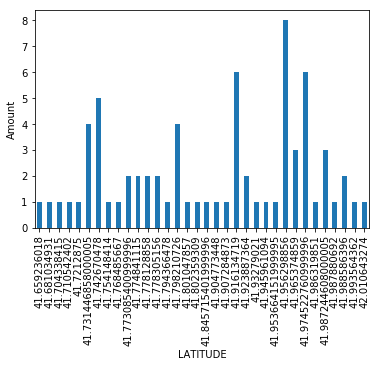

Cluster 10


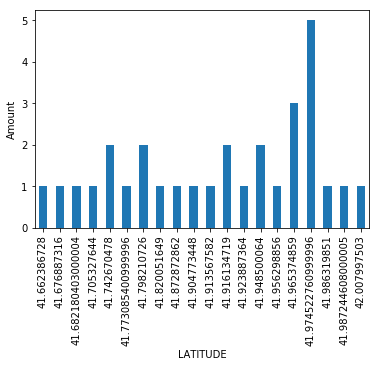

Cluster 11


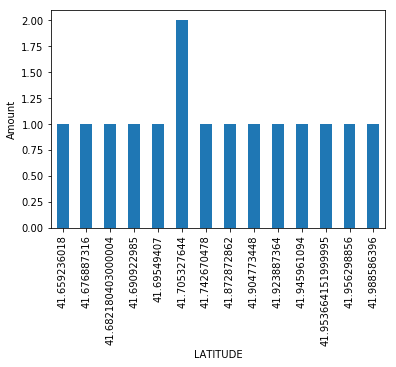

Cluster 0


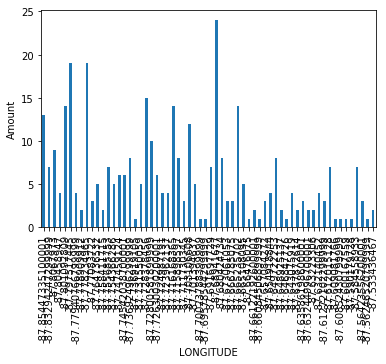

Cluster 1


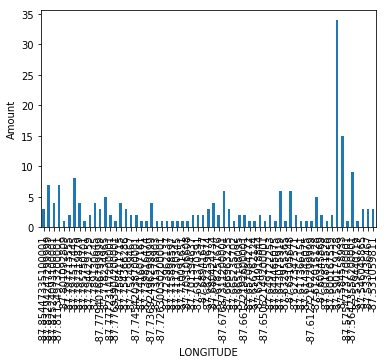

Cluster 2


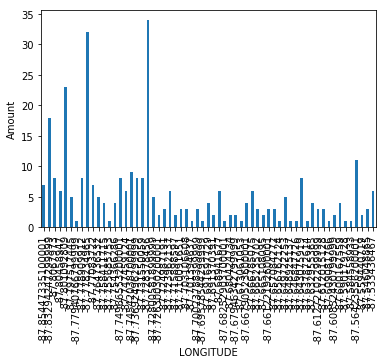

Cluster 3


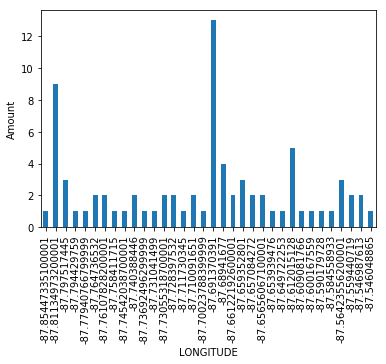

Cluster 4


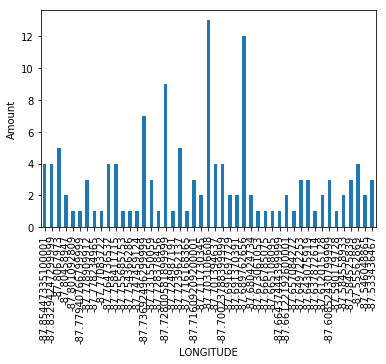

Cluster 5


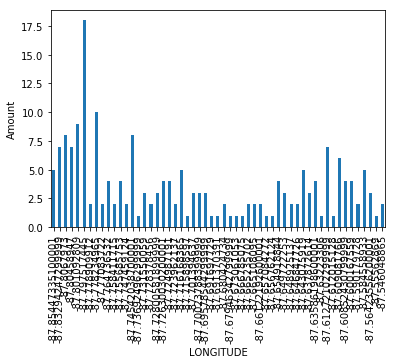

Cluster 6


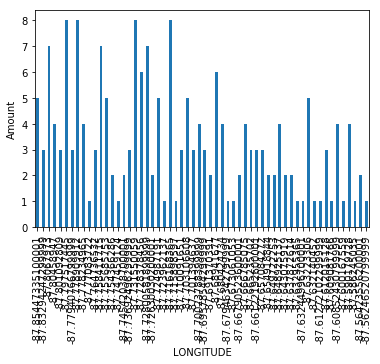

Cluster 7


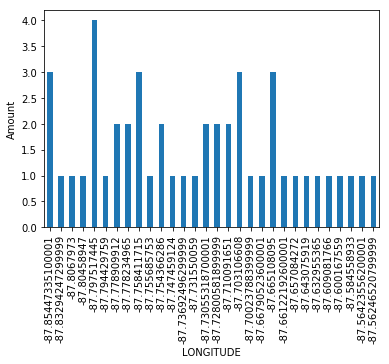

Cluster 8


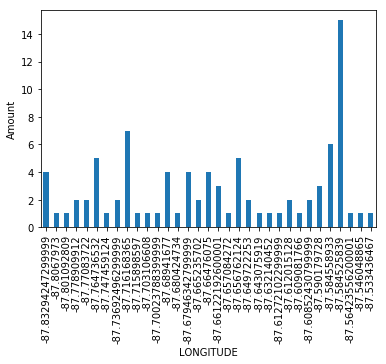

Cluster 9


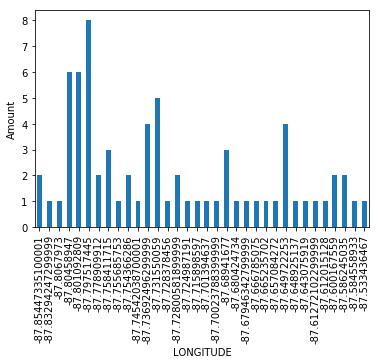

Cluster 10


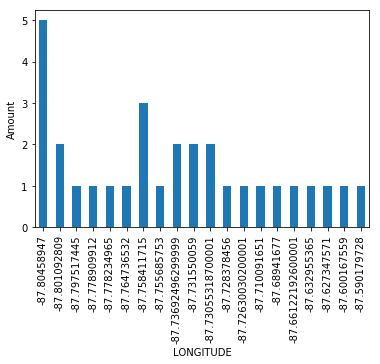

Cluster 11


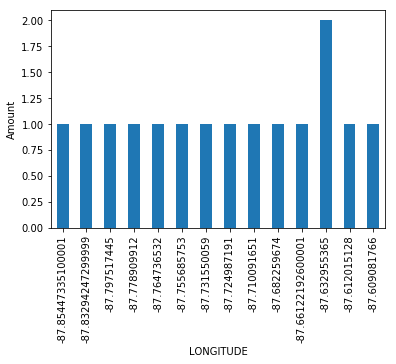

Cluster 0


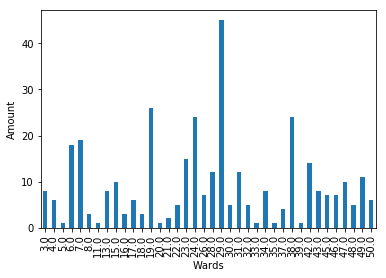

Cluster 1


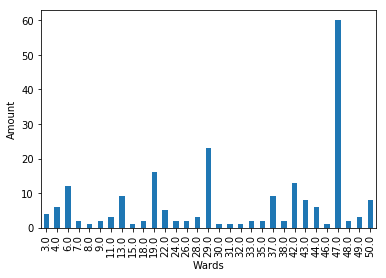

Cluster 2


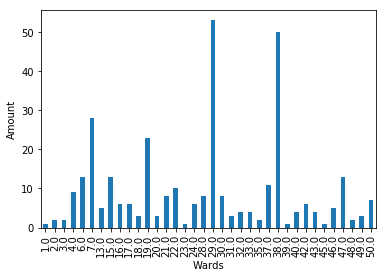

Cluster 3


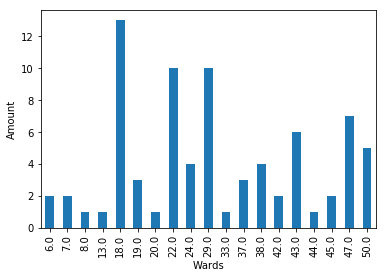

Cluster 4


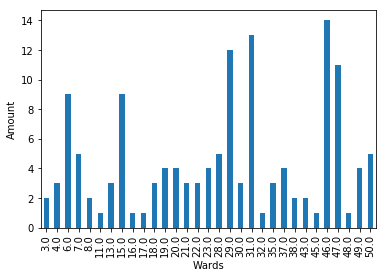

Cluster 5


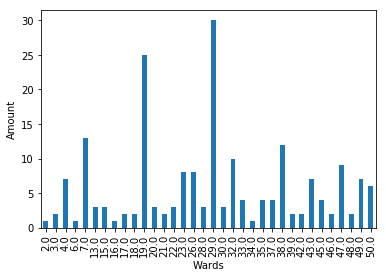

Cluster 6


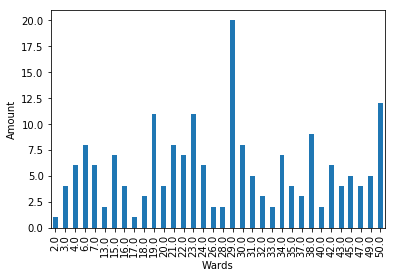

Cluster 7


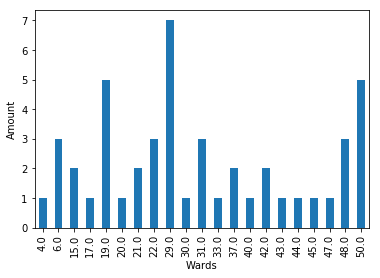

Cluster 8


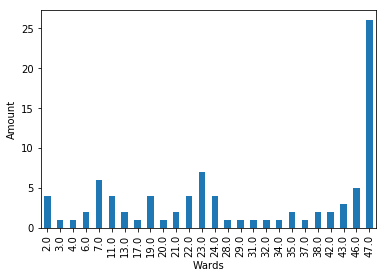

Cluster 9


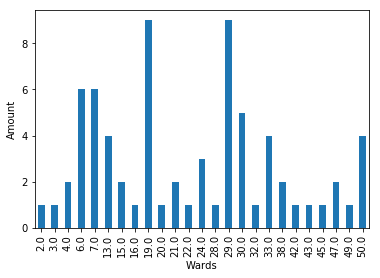

Cluster 10


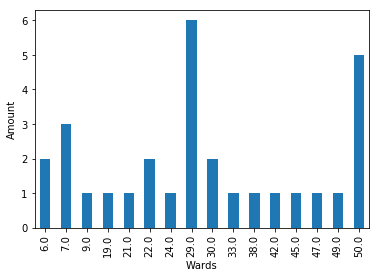

Cluster 11


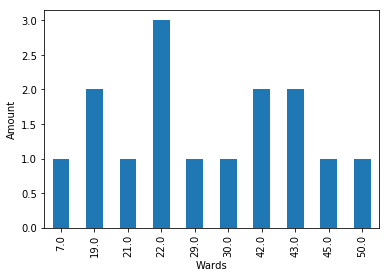

Cluster 0


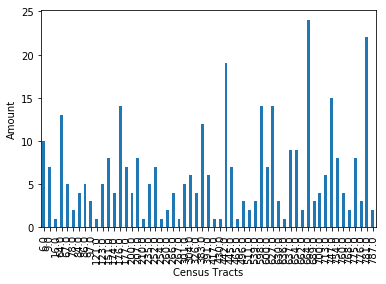

Cluster 1


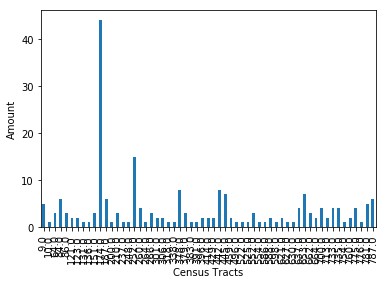

Cluster 2


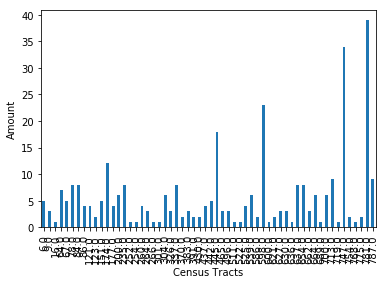

Cluster 3


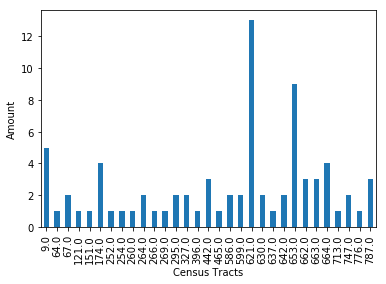

Cluster 4


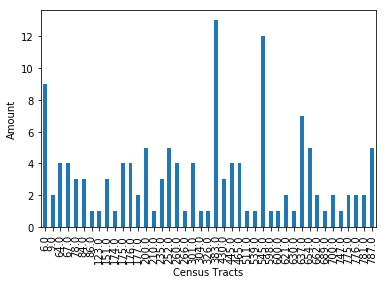

Cluster 5


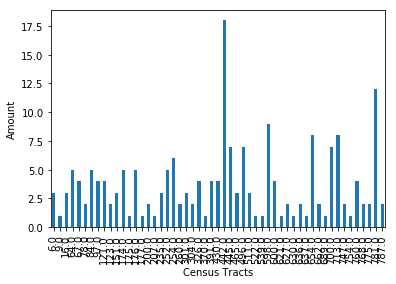

Cluster 6


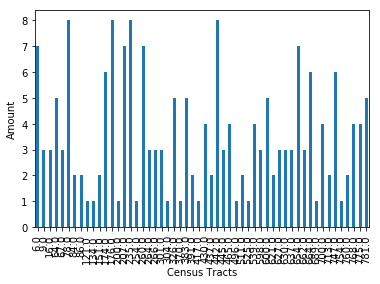

Cluster 7


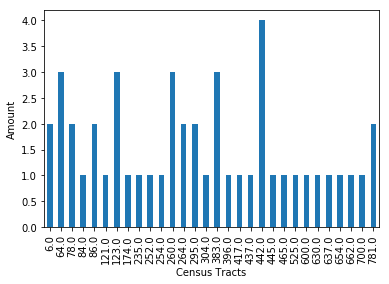

Cluster 8


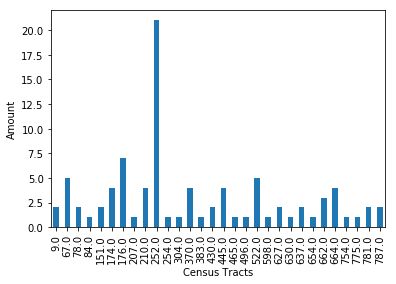

Cluster 9


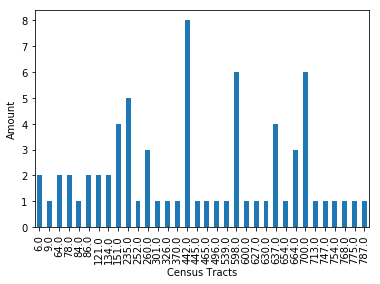

Cluster 10


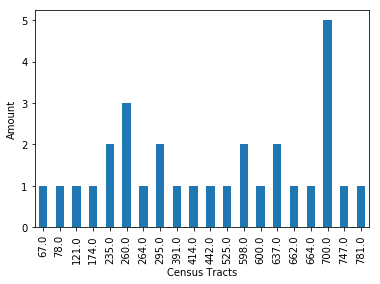

Cluster 11


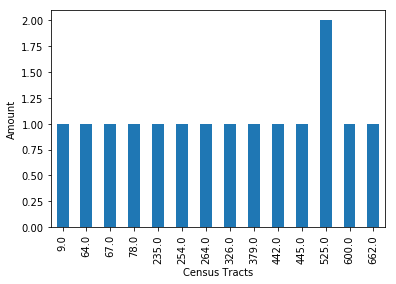

Cluster 0


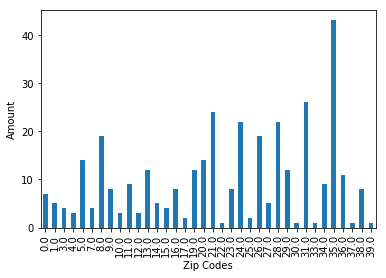

Cluster 1


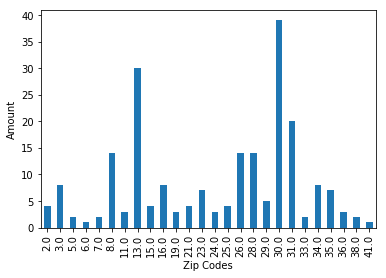

Cluster 2


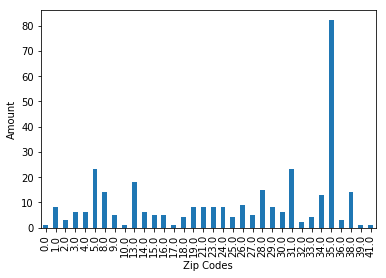

Cluster 3


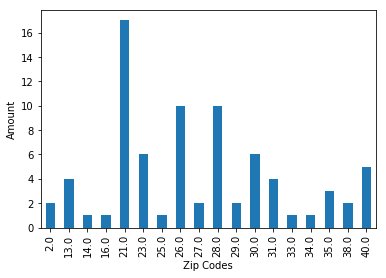

Cluster 4


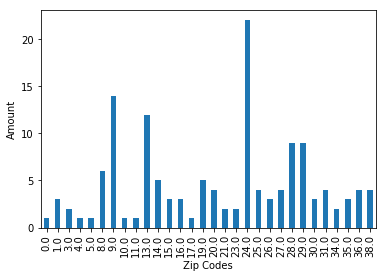

Cluster 5


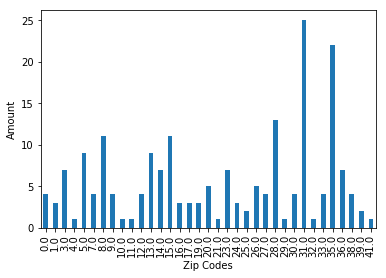

Cluster 6


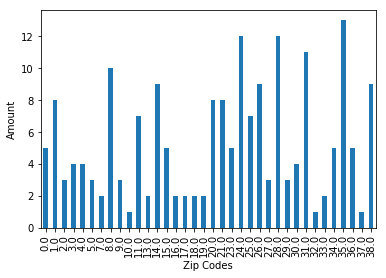

Cluster 7


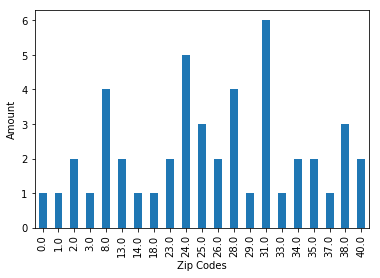

Cluster 8


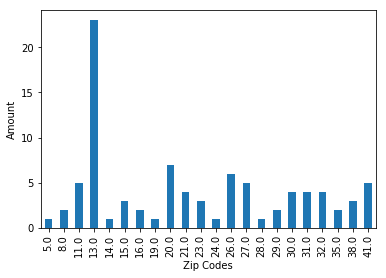

Cluster 9


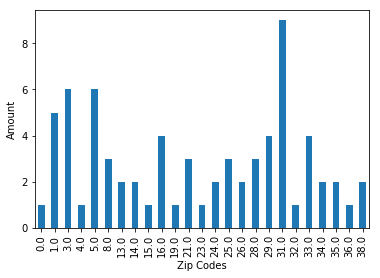

Cluster 10


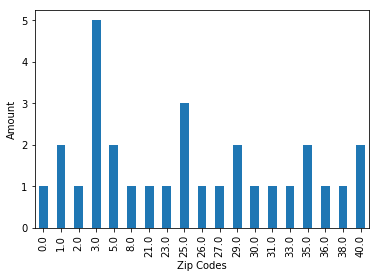

Cluster 11


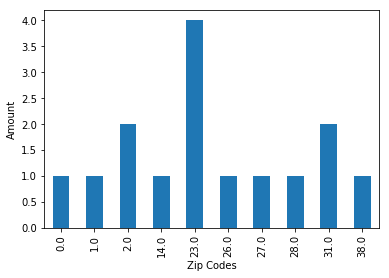

Cluster 0


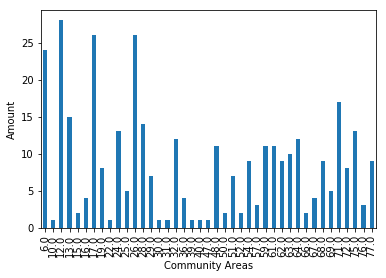

Cluster 1


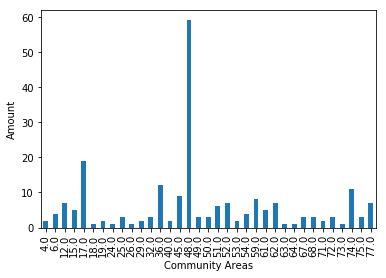

Cluster 2


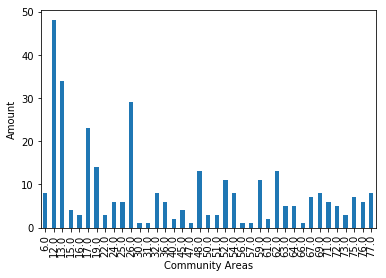

Cluster 3


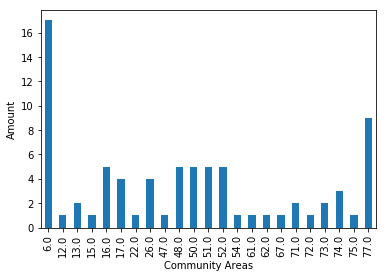

Cluster 4


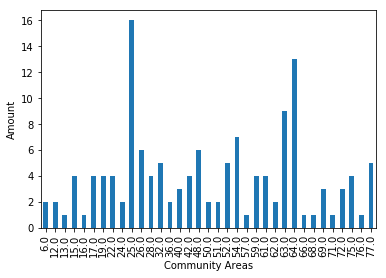

Cluster 5


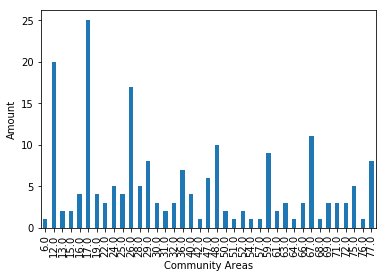

Cluster 6


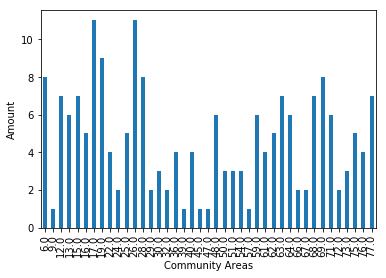

Cluster 7


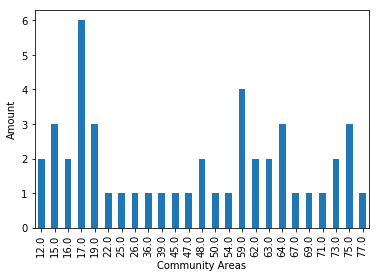

Cluster 8


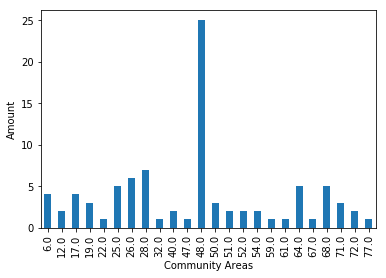

Cluster 9


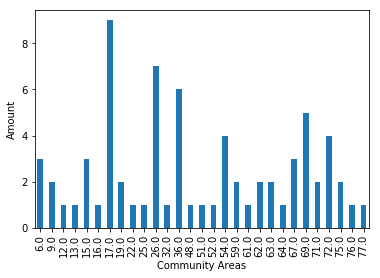

Cluster 10


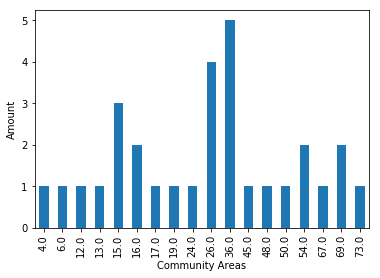

Cluster 11


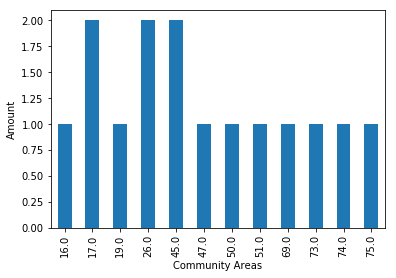

Cluster 0


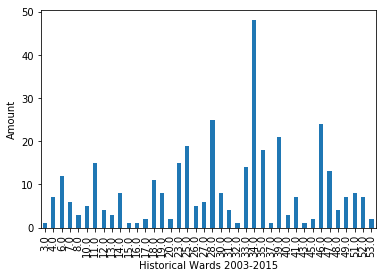

Cluster 1


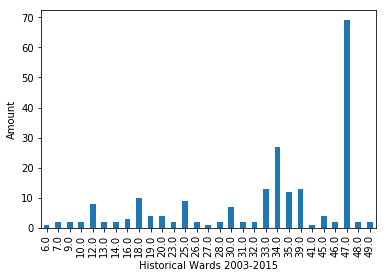

Cluster 2


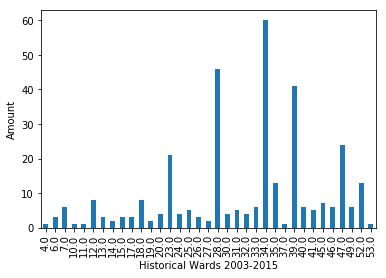

Cluster 3


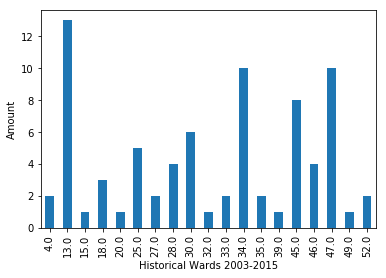

Cluster 4


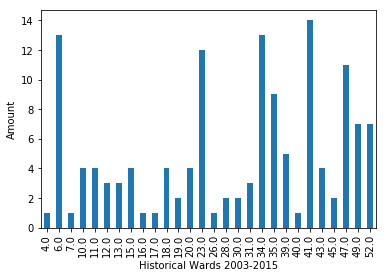

Cluster 5


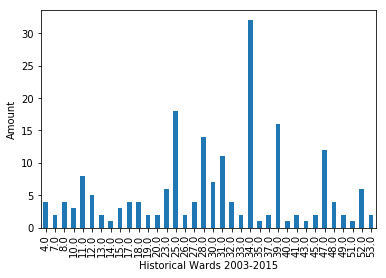

Cluster 6


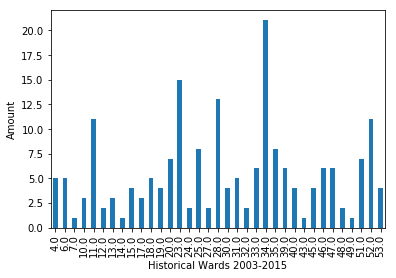

Cluster 7


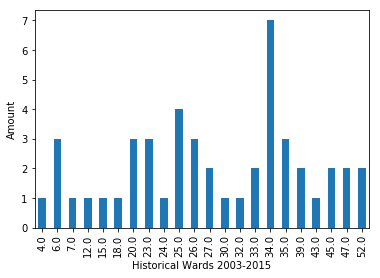

Cluster 8


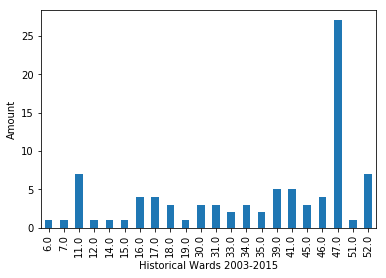

Cluster 9


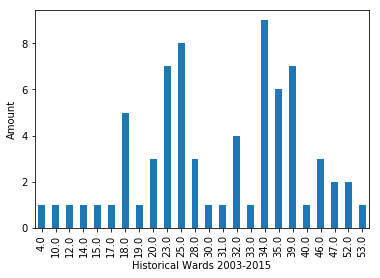

Cluster 10


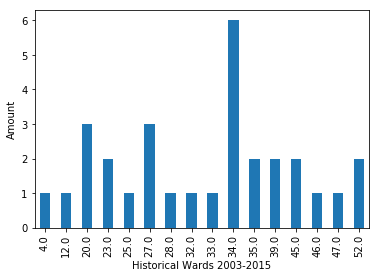

Cluster 11


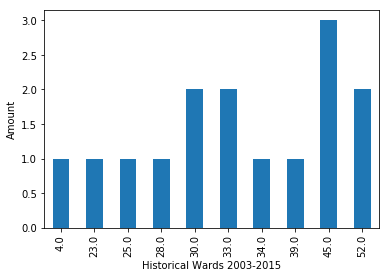

In [245]:
for col in cols:
    for c in range(idx):
        print('Cluster '+str(c))
        plt.figure()
        c_df = pd.DataFrame(data[result.labels_ == c], columns=cols)
        pos_mos = c_df[col].value_counts().sort_index().plot.bar()
        pos_mos.set_ylabel('Amount')
        pos_mos.set_xlabel(col)
        plt.show()